EDA

Librerias

In [196]:
import tensorflow as tf
tf.random.set_seed(123)
import glob
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [148]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)

In [10]:
paths = glob.glob('./data/*')
dict_path_classes = {f"{idx}":path.split('/')[-1] for idx, path in enumerate(paths)}
dict_path_classes

{'0': 'Mild_Demented',
 '1': 'Moderate_Demented',
 '2': 'Non_Demented',
 '3': 'Very_Mild_Demented'}

In [13]:
X = []
y = []
for key, value in dict_path_classes.items():
    print(key, value)
    for path in glob.glob(f'./data/{value}/*.jpg'):
        img = plt.imread(path)
        X.append(img.reshape(128,128,1))
        y.append(key)

0 Mild_Demented
1 Moderate_Demented
2 Non_Demented
3 Very_Mild_Demented


In [14]:
dfy = pd.DataFrame(data=y, columns=["labels"])
dfy.value_counts()

labels
2         3200
3         2240
0          896
1           64
Name: count, dtype: int64

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
X_PCA=pd.DataFrame(np.array([i.reshape(128,128).flatten() for i in X]))

In [17]:
projections = PCA(3,random_state=123).fit_transform(X_PCA)

In [18]:
df_projections = pd.DataFrame(data=projections, columns=[f'x{i}' for i in range(1,4)])
df_projections

x1           x2           x3
0     3189.331710  1115.094249   190.914037
1     3016.047018   433.588154   379.615476
2     3712.137280  -930.395994  1585.156292
3     3407.726277 -1676.888600  1268.490975
4     3326.014616  1147.149572  1820.782440
...           ...          ...          ...
6395 -2736.844356  -724.539704  -115.871220
6396 -2350.664192 -1152.603625   321.430454
6397 -2520.322113 -1522.065152  -642.202712
6398 -2007.154052   624.855286  1943.445892
6399 -2540.012340  -360.448342   818.893822

[6400 rows x 3 columns]

In [21]:
df_projections['label'] = y
df_projections

x1           x2           x3 label
0     3189.331710  1115.094249   190.914037     0
1     3016.047018   433.588154   379.615476     0
2     3712.137280  -930.395994  1585.156292     0
3     3407.726277 -1676.888600  1268.490975     0
4     3326.014616  1147.149572  1820.782440     0
...           ...          ...          ...   ...
6395 -2736.844356  -724.539704  -115.871220     3
6396 -2350.664192 -1152.603625   321.430454     3
6397 -2520.322113 -1522.065152  -642.202712     3
6398 -2007.154052   624.855286  1943.445892     3
6399 -2540.012340  -360.448342   818.893822     3

[6400 rows x 4 columns]

<Axes: >

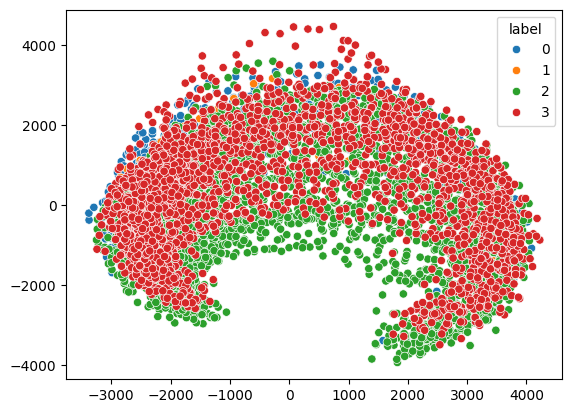

In [22]:
sns.scatterplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

<Axes: >

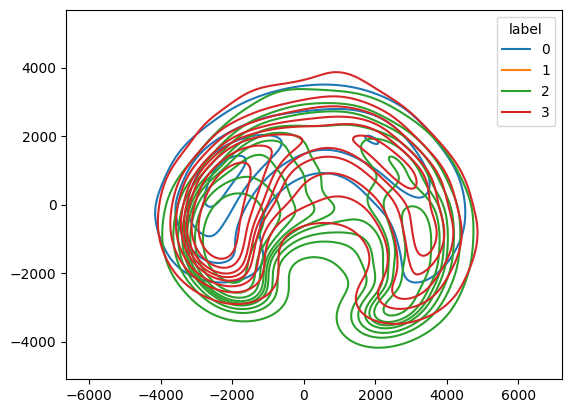

In [23]:
sns.kdeplot(data=df_projections,x=projections[:,0], y=projections[:,1], hue='label')

In [24]:
def create_dataset_b():
    y_b = []
    for label in y:
        if label in ["0","1", "3"]:
            y_b.append(1)
        else:
            y_b.append(0)
    return np.array(y_b)

In [25]:
y_b = create_dataset_b()
y_b.shape

(6400,)

In [26]:
df1 = pd.DataFrame(data=y_b, columns=["labels"])
df1.value_counts()

labels
0         3200
1         3200
Name: count, dtype: int64

In [27]:
df2 = pd.DataFrame(data=projections, columns=[f'x{i}' for i in range(1,4)])
df2

x1           x2           x3
0     3189.331710  1115.094249   190.914037
1     3016.047018   433.588154   379.615476
2     3712.137280  -930.395994  1585.156292
3     3407.726277 -1676.888600  1268.490975
4     3326.014616  1147.149572  1820.782440
...           ...          ...          ...
6395 -2736.844356  -724.539704  -115.871220
6396 -2350.664192 -1152.603625   321.430454
6397 -2520.322113 -1522.065152  -642.202712
6398 -2007.154052   624.855286  1943.445892
6399 -2540.012340  -360.448342   818.893822

[6400 rows x 3 columns]

In [28]:
df2['label'] = y_b
df2

x1           x2           x3  label
0     3189.331710  1115.094249   190.914037      1
1     3016.047018   433.588154   379.615476      1
2     3712.137280  -930.395994  1585.156292      1
3     3407.726277 -1676.888600  1268.490975      1
4     3326.014616  1147.149572  1820.782440      1
...           ...          ...          ...    ...
6395 -2736.844356  -724.539704  -115.871220      1
6396 -2350.664192 -1152.603625   321.430454      1
6397 -2520.322113 -1522.065152  -642.202712      1
6398 -2007.154052   624.855286  1943.445892      1
6399 -2540.012340  -360.448342   818.893822      1

[6400 rows x 4 columns]

<Axes: >

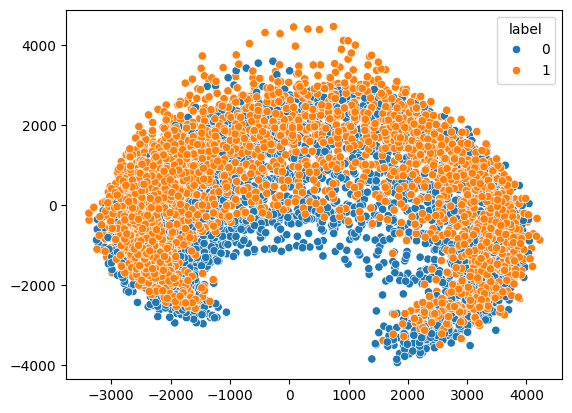

In [31]:
sns.scatterplot(data=df2,x=projections[:,0], y=projections[:,1], hue='label')

<Axes: >

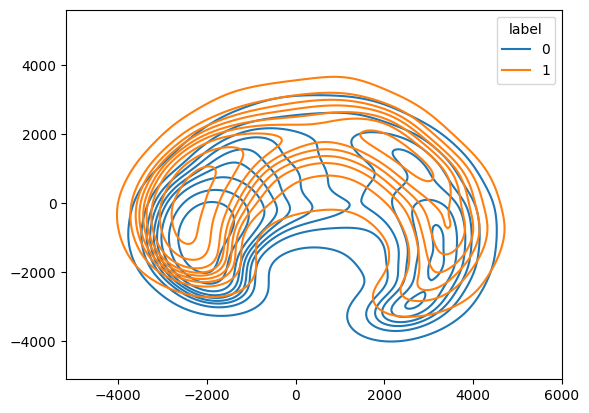

In [32]:
sns.kdeplot(data=df2,x=projections[:,0], y=projections[:,1], hue='label')

RED

En este punto, empleamos el framework Optuna, una herramienta que facilita la optimización de hiperparámetros en algoritmos como las redes neuronales. Optuna utiliza una combinación de algoritmos genéticos y otras técnicas de optimización con el objetivo de identificar la mejor solución posible dentro de un vasto conjunto de posibilidades. Además, aprovecha cálculos y técnicas estadísticas avanzadas para reducir tanto el tiempo de procesamiento como los recursos computacionales necesarios, sin sacrificar la eficiencia del proceso.

In [44]:
BATCH_SIZE = 12
EPOCHS = 100

def create_initial_dataset():
    """_summary_
    This function create 2 numpy arrays to generate initial dataset
    Returns:
        numpy.array: desing metrix
        numpy.array: observation vector
    """
    X = []
    y = []
    for key, value in dict_path_classes.items():
        for path in glob.glob(f'./data/{value}/*.jpg'):
            img = plt.imread(path)
            X.append(img.reshape(128,128,1))
            y.append(key)
    return np.array(X), np.array(y)

X, y = create_initial_dataset()

In [34]:
def create_cnn_model(trial):
    """_summary_

    Returns:
        _type_: _description_
    """
    kernel_sizes = [(2, 2), (3, 3)]
    kz_selected = trial.suggest_categorical("kernel_size", kernel_sizes)
    model = tf.keras.models.Sequential(name="Pretraining_CNN")
    model.add(tf.keras.layers.Input(shape=(128, 128,1), name="input_layer"))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_1"))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_2"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="max_pool_1"))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_3"))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kz_selected,
              padding='same', activation="relu", name="conv2D_4"))
    model.add(tf.keras.layers.Flatten(name="flatten"))
    model.add(tf.keras.layers.Dense(256, activation='relu', name="MLP_1"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_1"))
    model.add(tf.keras.layers.Dense(128, activation='relu', name="MLP_2"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_2"))
    model.add(tf.keras.layers.Dense(64, activation='relu', name="MLP_3"))
    model.add(tf.keras.layers.Dropout(0.2, name="drop_out_3"))
    model.add(tf.keras.layers.Dense(
        2, activation='softmax', name="output_classification"))
    model.summary()
    return model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_b, random_state=123, test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=123, test_size=0.2)

In [47]:
def create_data_set():
    """_summary_

    Returns:
        _type_: _description_
    """
    train_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_train, y_train))
    train_ds = train_ds.shuffle(buffer_size=len(
        y_train), seed=123).batch(batch_size=BATCH_SIZE)

    valid_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_val, y_val))
    valid_ds = valid_ds.shuffle(buffer_size=len(
        y_val), seed=123).batch(batch_size=BATCH_SIZE)

    test_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_test, y_test))
    test_ds = test_ds.shuffle(buffer_size=len(
        y_test), seed=123).batch(batch_size=BATCH_SIZE)
    return train_ds, valid_ds, test_ds

In [27]:
def create_optimizer(trial):
    kwargs = {}
    kwargs["learning_rate"] = trial.suggest_float(
        "learning_rate", 1e-4, 1e-2, log=True)
    optimizer = getattr(tf.optimizers, 'Adam')(**kwargs)
    return optimizer

In [28]:
def plot_loss_metric(history, params, _trial_id):
    """_summary_

    Args:
        history (_type_): _description_
        params (_type_): _description_
        _trial_id (_type_): _description_
    """
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(25,15))
    kz, lr = params['kernel_size'], params['learning_rate']
    plt.suptitle(f'tria_id:{_trial_id} | kz:{kz} | lr:{lr}', fontsize=20, y=0.98)

    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label='Loss on Training')
    plt.plot(epochs, val_loss, label='Loss on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label='Accuracy on Training')
    plt.plot(epochs, val_acc, label='Accuracy on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('accuracy', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)


    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.savefig(f'loss_val_imgs/{_trial_id}_cnn.png')

In [29]:
def objective(trial):
    train_ds, valid_ds, test_ds = create_data_set()
    cnn_model = create_cnn_model(trial)
    optimizer = create_optimizer(trial)
    early_stop = EarlyStopping(
        monitor="val_loss", patience=7, mode="auto", verbose=1)
    cnn_model.compile(optimizer=optimizer,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = cnn_model.fit(train_ds, validation_data=valid_ds,
                  epochs=EPOCHS, callbacks=[early_stop], verbose=2)
    plot_loss_metric(history, trial.__dict__['_cached_frozen_trial'].params, trial.__dict__['_trial_id'])
    acc = cnn_model.evaluate(test_ds)[1]
    if np.isnan(acc):
        return -np.inf
    return acc

[I 2023-10-08 17:18:56,741] Using an existing study with name 'optimizing_cnn_parameters_for_pretrain' instead of creating a new one.


Model: "Pretraining_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 conv2D_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 64, 32)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2D_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 MLP_1 (Dense)               (None, 256)           

[I 2023-10-08 17:21:59,428] Trial 10 finished with value: 0.989062488079071 and parameters: {'kernel_size': [3, 3], 'learning_rate': 0.00010730414053042049}. Best is trial 4 with value: 0.989062488079071.


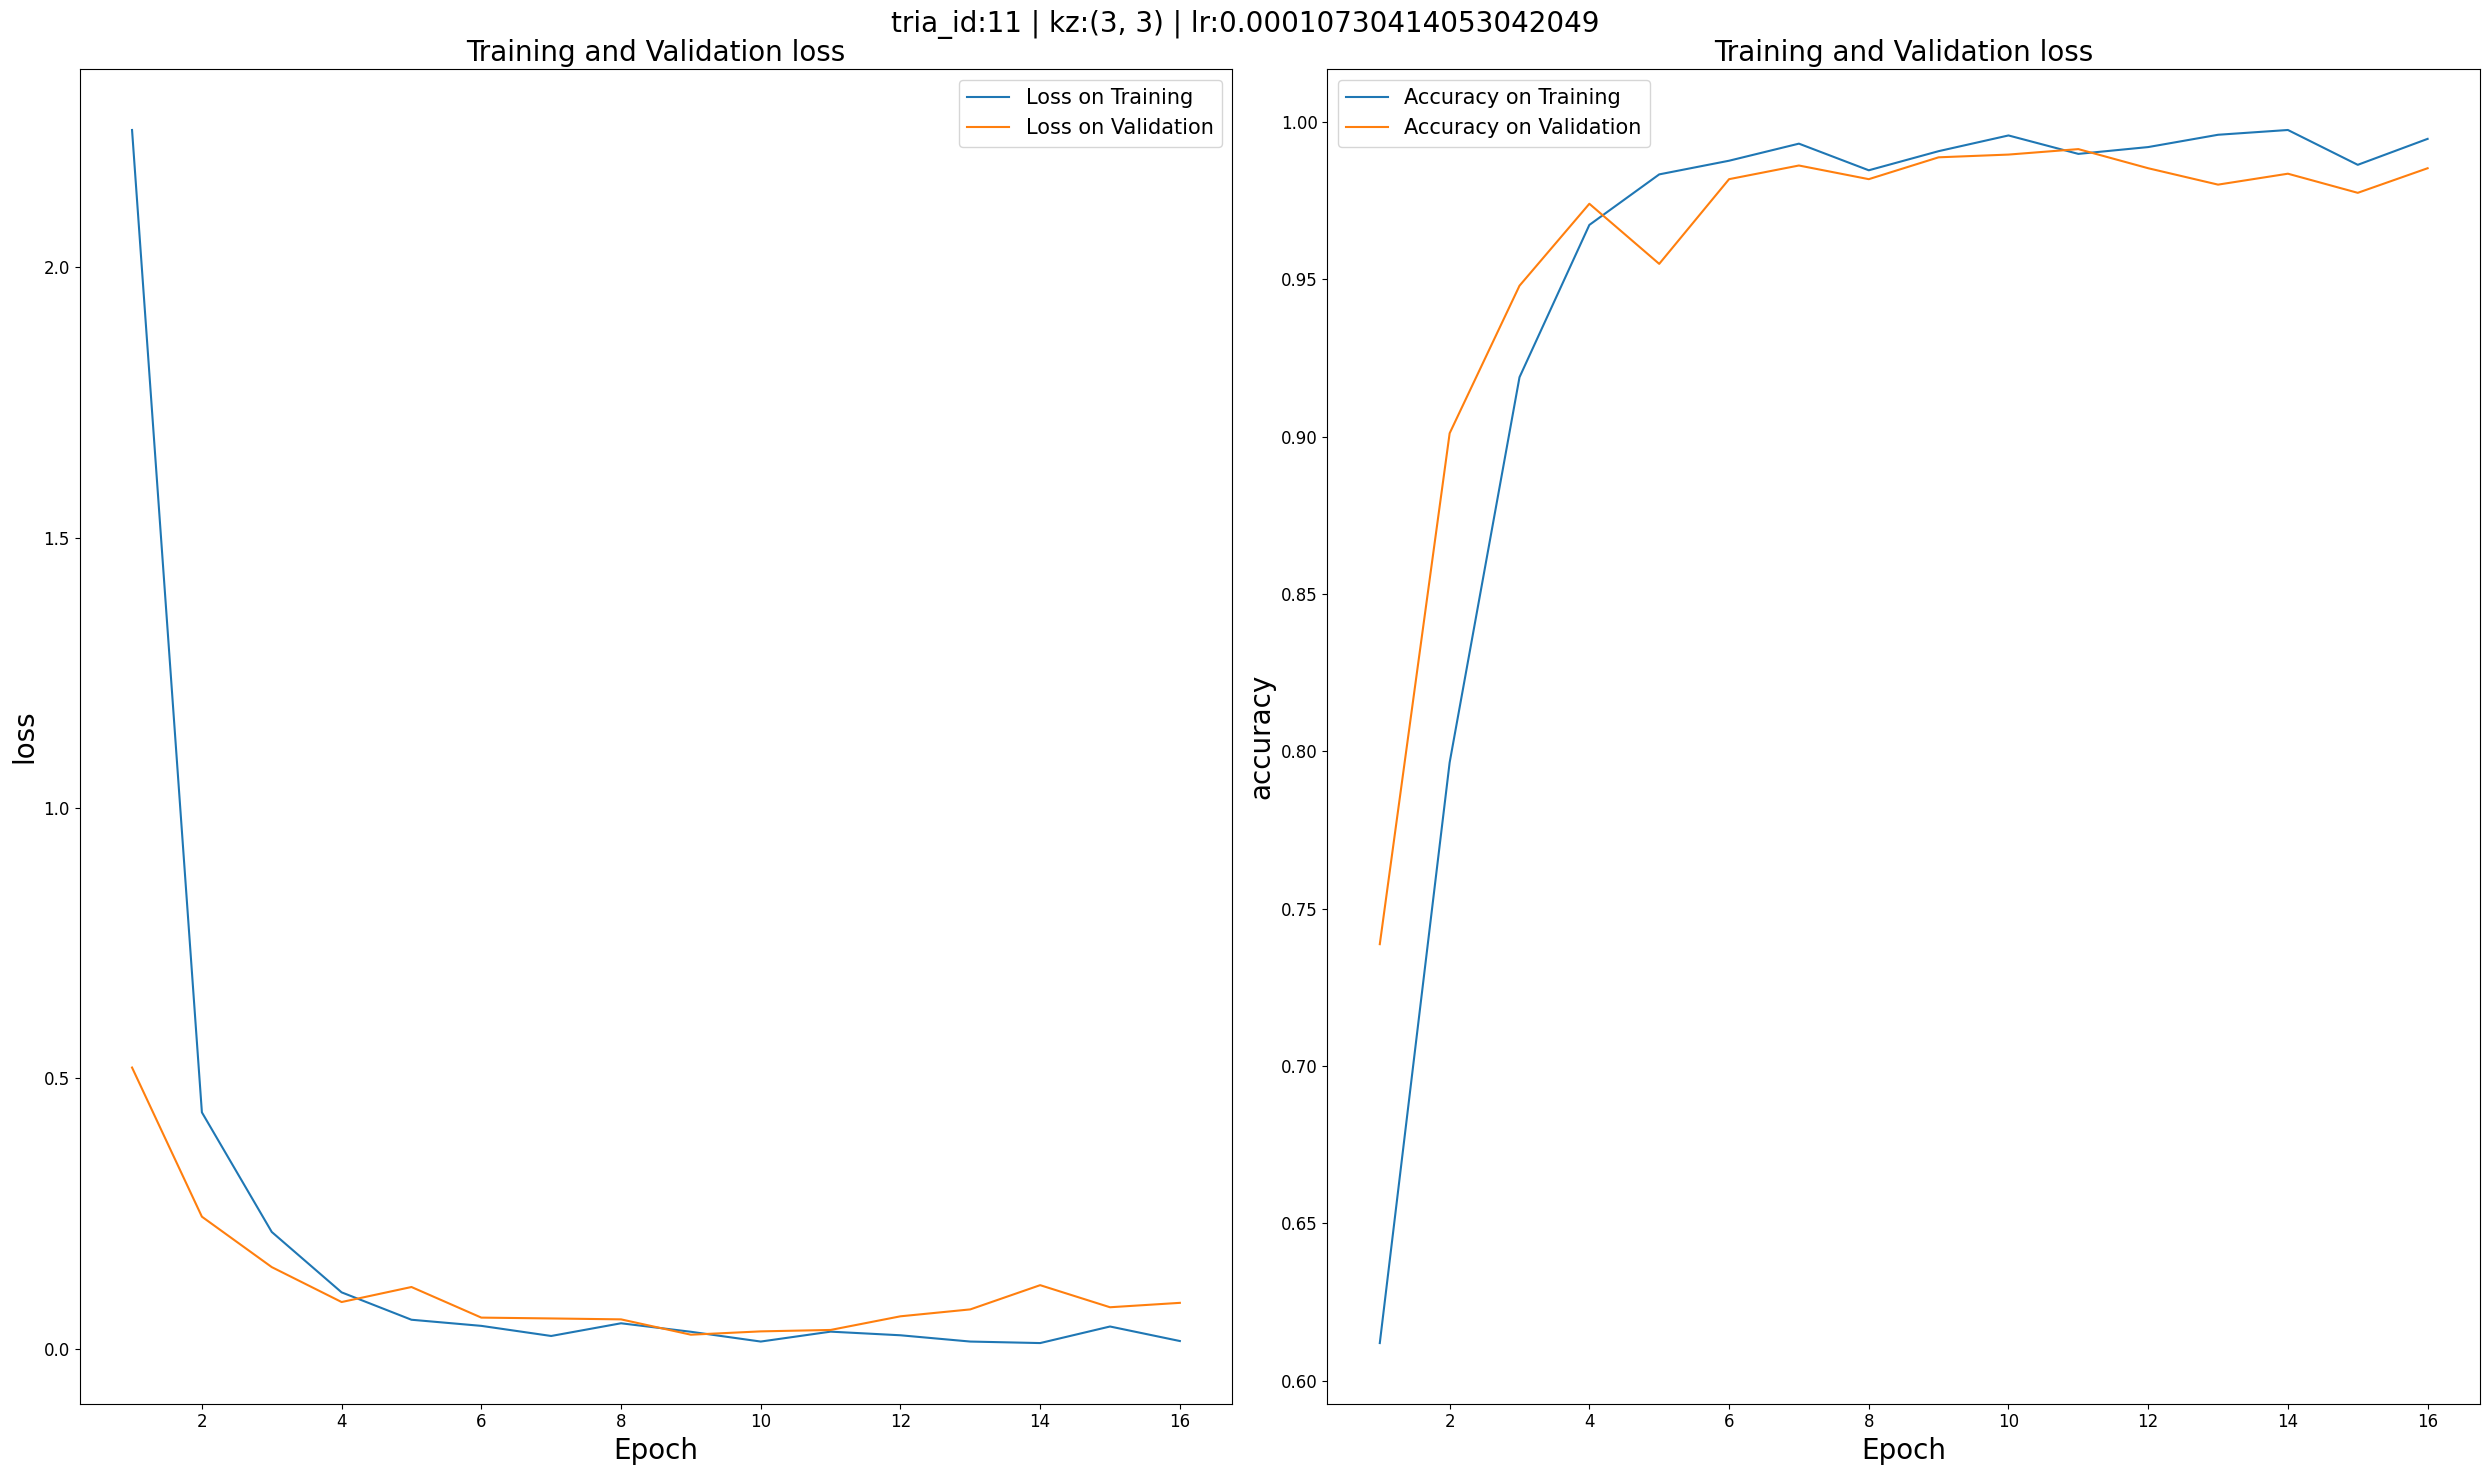

In [30]:
study = optuna.create_study(study_name="optimizing_cnn_parameters_for_pretrain",
                            storage='sqlite:///db/optimizing_cnn_parameters_for_pretrain.db', direction='maximize', load_if_exists=True)
study.optimize(objective, n_trials=1)

In [31]:
best_params = study.best_params 
best_params

{'kernel_size': [3, 3], 'learning_rate': 0.00011591261365393815}

In [32]:
model = tf.keras.models.Sequential(name="Pretraining_CNN")
model.add(tf.keras.layers.Input(shape=(128, 128,1), name="input_layer"))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_1"))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_2"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="max_pool_1"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_3"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=best_params['kernel_size'],
            padding='same', activation="relu", name="conv2D_4"))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(256, activation='relu', name="MLP_1"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_1"))
model.add(tf.keras.layers.Dense(128, activation='relu', name="MLP_2"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_2"))
model.add(tf.keras.layers.Dense(64, activation='relu', name="MLP_3"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_3"))
model.add(tf.keras.layers.Dense(
    2, activation='softmax', name="output_classification"))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=best_params['learning_rate']),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "Pretraining_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 conv2D_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 64, 32)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2D_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 MLP_1 (Dense)               (None, 256)           

Particionamos el set de datos en train, val, test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_b, random_state=123, test_size=0.1) # test

In [49]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=123, test_size=0.2) #train + val

In [35]:
train_ds, valid_ds, test_ds = create_data_set()
early_stop = EarlyStopping(
    monitor="val_loss", patience=7, mode="auto", verbose=1)

In [36]:
history = model.fit(train_ds, validation_data=valid_ds,
                epochs=EPOCHS, callbacks=[early_stop], verbose=1)

Epoch 1/100
384/384 [==============================] - 12s 29ms/step - loss: 1.0618 - accuracy: 0.6790 - val_loss: 0.3838 - val_accuracy: 0.8446
Epoch 2/100
384/384 [==============================] - 11s 28ms/step - loss: 0.2677 - accuracy: 0.8891 - val_loss: 0.1221 - val_accuracy: 0.9531
Epoch 3/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0671 - accuracy: 0.9770 - val_loss: 0.0690 - val_accuracy: 0.9748
Epoch 4/100
384/384 [==============================] - 11s 28ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 5/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 6/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0646 - val_accuracy: 0.9792
Epoch 7/100
384/384 [==============================] - 11s 29ms/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0368 - val_ac

In [39]:
def plot_loss_metric_train(history):
    """_summary_

    Args:
        history (_type_): _description_
        params (_type_): _description_
        _trial_id (_type_): _description_
    """
    train_loss = history.history['loss']
    train_acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss)+1)

    plt.figure(figsize=(25,15))


    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label='Loss on Training')
    plt.plot(epochs, val_loss, label='Loss on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label='Accuracy on Training')
    plt.plot(epochs, val_acc, label='Accuracy on Validation')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('accuracy', fontsize=20)
    plt.title('Training and Validation loss', fontsize=20)


    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)



    plt.tight_layout()
    plt.savefig('loss_val_imgs/best_params_cnn.png')


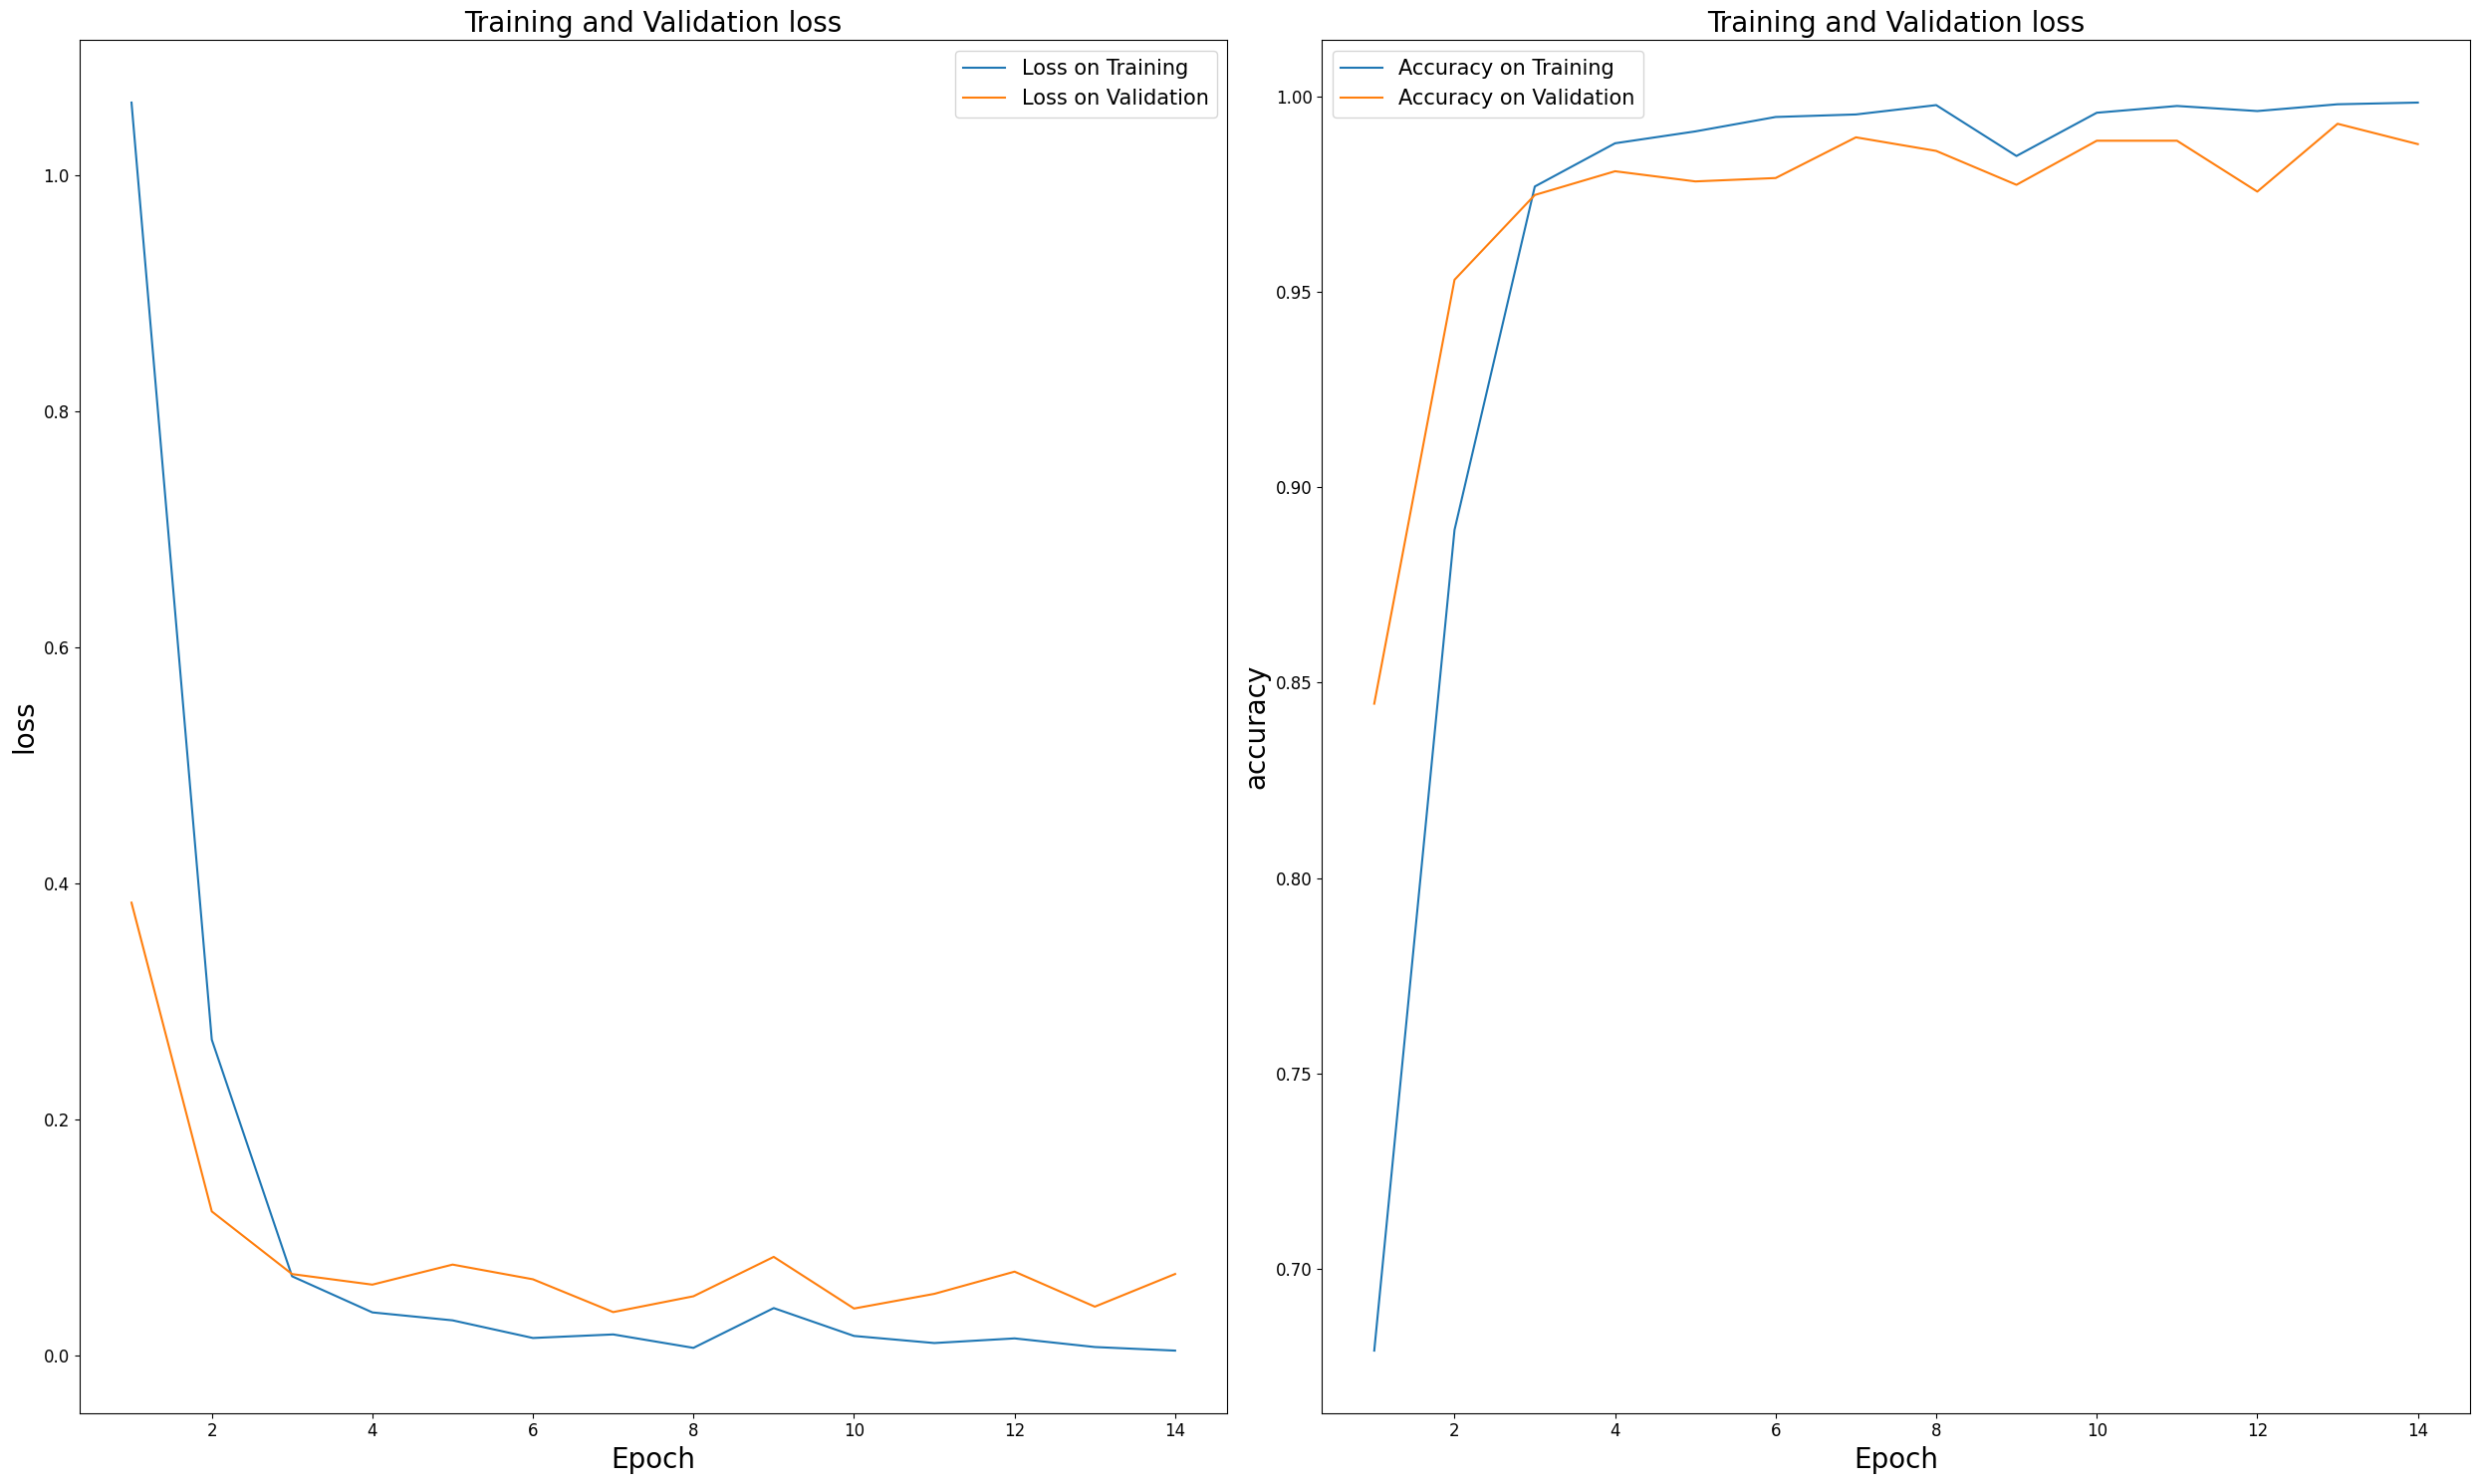

In [41]:
plot_loss_metric_train(history)

In [42]:
model.save('cnn_model/best_model.h5')

In [35]:
model = tf.keras.models.load_model("cnn_model/best_model.h5", compile=False)
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('MLP_3').output)

In [50]:
BATCH_SIZE = 12

ds = tf.data.Dataset.from_tensor_slices(tensors=(X, y_b))
ds = ds.shuffle(buffer_size = len(y_b), seed=123).batch(batch_size=BATCH_SIZE)

In [51]:
DB1 = intermediate_layer_model.predict(ds)

534/534 [==============================] - 30s 55ms/step


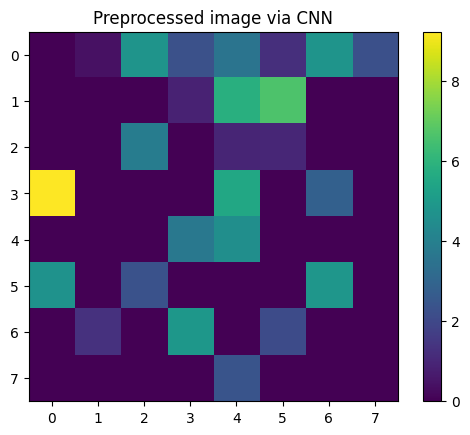

In [52]:
plt.imshow(DB1[0].reshape(8,8), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Preprocessed image via CNN")
plt.show()

In [53]:
DB1.shape

(6400, 64)

In [ ]:
results_pca={}
for n_dimens in range(80,150):
    results_pca[n_dimens] = PCA(n_dimens,random_state=321).fit(X_PCA).explained_variance_ratio_.sum()
    if results_pca[n_dimens]>=0.8:
        break

In [95]:
pd.DataFrame(list(results_pca.items()), columns=["n_components", "explained_variance_ratio_sum"]).tail(7)

n_components  explained_variance_ratio_sum
40           120                      0.746818
41           121                      0.747904
42           122                      0.749047
43           123                      0.750093
44           124                      0.751173
45           125                      0.752222
46           126                      0.753314

In [279]:
DB2=PCA(121,random_state=123).fit_transform(X_PCA)

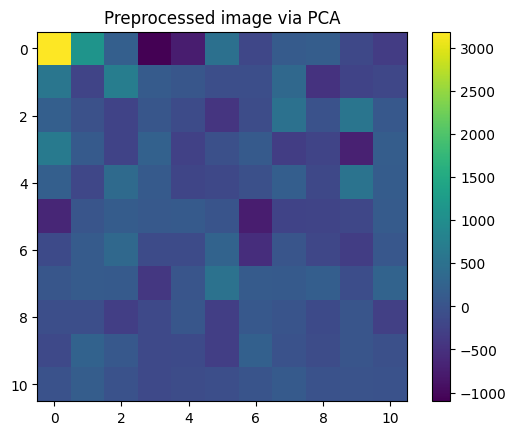

In [280]:
plt.imshow(DB2[0].reshape(11,11), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Preprocessed image via PCA")
plt.show()

In [281]:
DB3=pd.DataFrame(np.hstack([DB1,DB2]))
DB3

0         1         2         3         4         5         6    \
0     0.000000  0.415245  4.787612  2.287070  3.565693  1.245305  4.763586   
1     0.000000  1.029149  1.745118  0.912362  1.354266  0.727663  2.068389   
2     0.000000  4.209548  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.389341  4.845225  1.497285  4.143698  2.694553  4.453362   
4     0.000000  3.927462  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
6395  0.000000  3.525477  0.000000  0.000000  0.000000  0.000000  0.310845   
6396  0.000000  3.720365  0.000000  0.000000  0.366914  0.000000  0.000000   
6397  0.000000  0.000000  5.340129  2.030467  3.916627  2.151772  4.049761   
6398  0.000000  2.743265  0.000000  0.000000  0.000000  0.000000  0.000000   
6399  1.069564  1.660556  5.133305  1.989270  4.461762  2.512130  3.516260   

           7         8         9    ...         175         176         177  \
0     2.237181  0.000000  0.000000  ...  166.366552  -17.471231 -150.516329   
1     1.477631  0.531444  1.239163  ... -111.165300   67.252035 -184.704183   
2     0.000000  5.939451  4.115521  ... -120.670471 -141.143192  196.357001   
3     2.443494  0.000000  0.000000  ...   14.813181   67.978775   98.469698   
4     0.000000  4.662671  3.231194  ... -109.614034 -377.531162 -328.037457   
...        ...       ...       ...  ...         ...         ...         ...   
6395  0.490641  3.940863  4.933490  ...  166.746235  -66.311611  382.729131   
6396  0.873068  6.145244  4.857708  ... -137.154849 -352.865152  168.620973   
6397  2.946271  0.000000  0.000000  ...   22.741421  410.189418   32.994165   
6398  0.840051  3.786863  3.344163  ...  -21.601913 -204.659127  236.410605   
6399  4.337542  0.000000  0.000000  ...  177.376222  124.717791  -51.298949   

             178         179         180         181         182         183  \
0     -95.841456  -67.539511   17.377372  112.770150  -14.357728    0.951422   
1      75.104317  307.122831  130.209767  -48.871245   91.952292  -57.801253   
2     234.093151  -10.512620  -27.615577  300.935236 -148.580766   41.878876   
3     264.169007  -98.808217  -15.234744   15.667033  -92.241392  -37.873214   
4    -118.318045   18.529694  217.771660  -17.598266 -266.449319  118.401658   
...          ...         ...         ...         ...         ...         ...   
6395  -48.150303  310.227137   -6.276297  -71.674988 -115.916541   56.468926   
6396  -58.633742 -193.357346   23.263773  -92.689404   59.621856  -32.628335   
6397 -306.555458  -38.797466   27.002717   61.815919  -51.105063 -263.490415   
6398   24.713411  314.459549 -126.791235  -83.851802 -127.094104   87.564098   
6399 -105.242697  -87.658780  296.588003 -227.665213  257.569663   11.094183   

             184  
0     -23.162537  
1     -47.493693  
2     -78.776146  
3     231.653074  
4    -105.727916  
...          ...  
6395  -18.671810  
6396  -10.226446  
6397 -458.379317  
6398   40.776686  
6399   11.505617  

[6400 rows x 185 columns]

In [282]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(DB3,y_b, random_state=123, test_size=0.2)

In [283]:
svm_model = SVC(random_state=123)
xb_model = XGBClassifier(random_state=123)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

## SVM

In [284]:
y_pred_svm_nt = svm_model.fit(X_train_,y_train_).predict(X_test_)
print(classification_report(y_test_,y_pred_svm_nt, digits=5))

              precision    recall  f1-score   support

           0    0.92620   0.96244   0.94398       639
           1    0.96104   0.92356   0.94193       641

    accuracy                        0.94297      1280
   macro avg    0.94362   0.94300   0.94295      1280
weighted avg    0.94365   0.94297   0.94295      1280



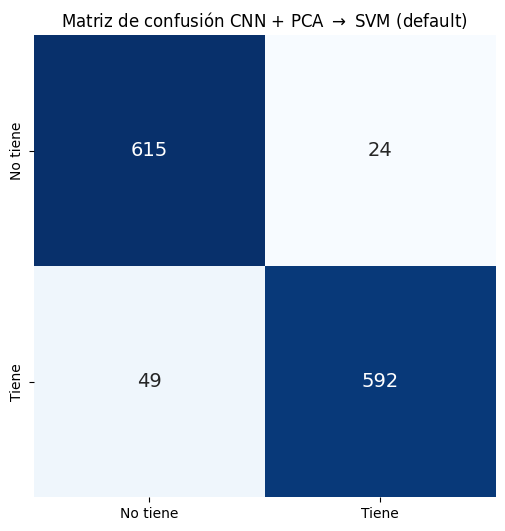

In [285]:
cm_svm = confusion_matrix(y_test_, y_pred_svm_nt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ SVM (default)")
plt.show()


In [286]:
# Definir la grilla de hiperparámetros que deseas explorar
param_grid = {
    'C': [0.1, 1, 3],  # Valores de regularización
    'kernel': ['rbf', 'poly'],  # Tipos de kernel,
    'degree':[2,3,4],
    'gamma': ['scale', 'auto', 0.1, 1]  # Coeficiente gamma
}

# Crear un modelo SVM
svm_model = SVC()

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo SVM utilizando Grid Search
grid_search.fit(X_train_, y_train_)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 3], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [287]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_svm_model = grid_search.best_estimator_
print(best_svm_model)

SVC(C=0.1, degree=4, gamma=1, kernel='poly')


In [288]:
# Imprimir el reporte de clasificación del mejor modelo en los datos de prueba
y_pred_svm_t = best_svm_model.predict(X_test_)
print(classification_report(y_test_, y_pred_svm_t, digits=5))

              precision    recall  f1-score   support

           0    0.99843   0.99687   0.99765       639
           1    0.99688   0.99844   0.99766       641

    accuracy                        0.99766      1280
   macro avg    0.99766   0.99766   0.99766      1280
weighted avg    0.99766   0.99766   0.99766      1280



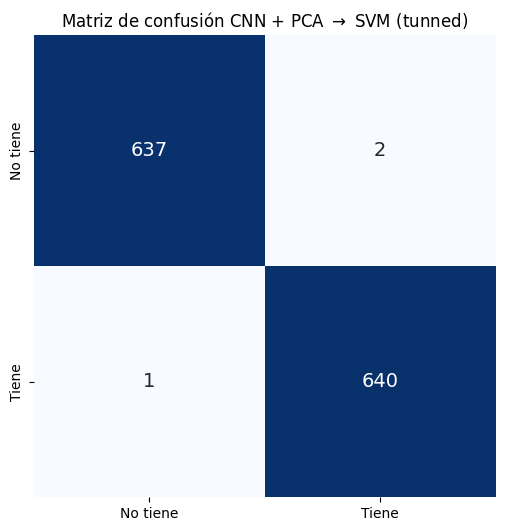

In [289]:
cm_svm = confusion_matrix(y_test_, y_pred_svm_t)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ SVM (tunned)")
plt.show()


## XB

In [290]:
y_pred_xb_nt = xb_model.fit(X_train_,y_train_).predict(X_test_)
print(classification_report(y_test_,y_pred_xb_nt, digits=5))

              precision    recall  f1-score   support

           0    0.95504   0.96401   0.95950       639
           1    0.96378   0.95476   0.95925       641

    accuracy                        0.95937      1280
   macro avg    0.95941   0.95938   0.95937      1280
weighted avg    0.95942   0.95937   0.95937      1280



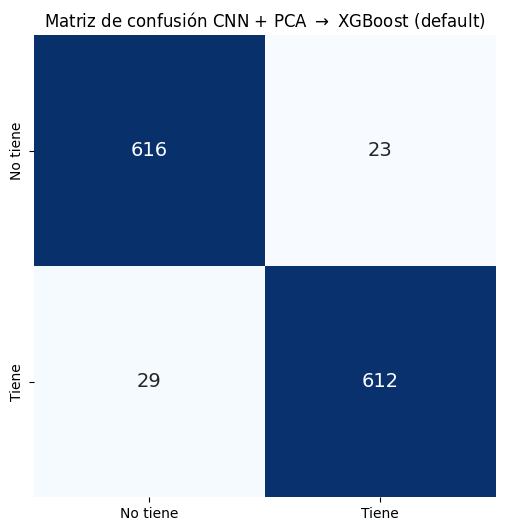

In [291]:
cm_xb = confusion_matrix(y_test_, y_pred_xb_nt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ XGBoost (default)")
plt.show()

In [292]:
# Definir la grilla de hiperparámetros que deseas explorar
param_grid_xb = {
    'n_estimators': [110, 120, 130],  # Estimadores
    'learning_rate': [0.001, 0.01, 0.1],  # alphas
    'max_depth': [10, 15, 20]
}

# Crear un modelo XGBoost
xb_model_ = XGBClassifier(random_state=123)

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search_xb = GridSearchCV(estimator=xb_model_, param_grid=param_grid_xb, cv=5, n_jobs=-1)

# Ajustar el modelo XGBoost utilizando Grid Search
grid_search_xb.fit(X_train_, y_train_)

/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_cate

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=123, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [110, 120, 130]})

In [293]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_xb_model = grid_search_xb.best_estimator_
print(best_xb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)


In [294]:
# Imprimir el reporte de clasificación del mejor modelo en los datos de prueba
y_pred_xb_t = best_xb_model.predict(X_test_)
print(classification_report(y_test_, y_pred_xb_t, digits=5))

              precision    recall  f1-score   support

           0    0.95538   0.97183   0.96354       639
           1    0.97143   0.95476   0.96302       641

    accuracy                        0.96328      1280
   macro avg    0.96341   0.96329   0.96328      1280
weighted avg    0.96342   0.96328   0.96328      1280



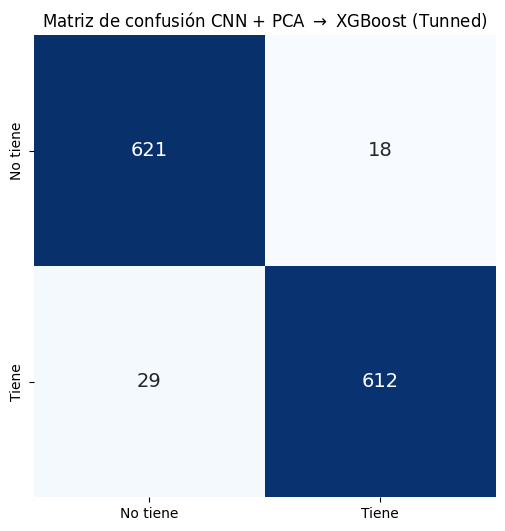

In [295]:
cm_xb_ = confusion_matrix(y_test_, y_pred_xb_t)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xb_, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ XGBoost (Tunned)")
plt.show()

# KNN

In [296]:
y_pred_knn_nt = knn_model.fit(X_train_,y_train_).predict(X_test_)
print(classification_report(y_test_,y_pred_knn_nt, digits=5))

              precision    recall  f1-score   support

           0    0.95122   0.97653   0.96371       639
           1    0.97596   0.95008   0.96285       641

    accuracy                        0.96328      1280
   macro avg    0.96359   0.96330   0.96328      1280
weighted avg    0.96361   0.96328   0.96328      1280



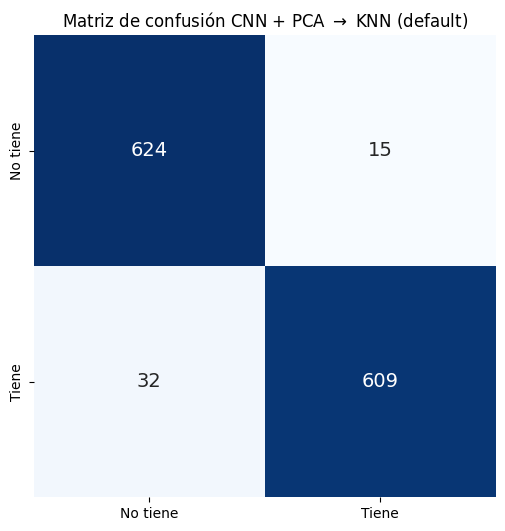

In [297]:
cm_knn = confusion_matrix(y_test_, y_pred_knn_nt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ KNN (default)")
plt.show()

In [298]:
# Definir la grilla de hiperparámetros que deseas explorar
param_grid_knn = {
    'n_neighbors':[3, 5, 11, 17],  # n vecinos 
    'weights': ['uniform','distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Crear un modelo KNN
knn_model_ = KNeighborsClassifier()

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search_knn = GridSearchCV(estimator=knn_model_, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo SVM utilizando Grid Search
grid_search_knn.fit(X_train_, y_train_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END ...algorithm=auto, n_neighbors=11, weights=distance; total time=   0.4s
[CV] END ...algorithm=auto, n_neighbors=17, weights=distance; total time=   0.4s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   0.4s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   0.5s
[CV] END ...algorithm=auto, n_neighbors=11, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END ...algorithm=auto, n_neighbors=17, weights=distance; total time=   0.5s
[CV] END ...algorithm=auto, n_neighbors=11, weights=distance; total time=   0.5s
[CV] END ....algorithm=auto,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 11, 17],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [299]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_knn_model = grid_search_knn.best_estimator_
print(best_knn_model)

KNeighborsClassifier(n_neighbors=3, weights='distance')


In [300]:
y_pred_knn_t = best_knn_model.predict(X_test_)
print(classification_report(y_test_,y_pred_knn_t, digits=5))

              precision    recall  f1-score   support

           0    0.98602   0.99374   0.98987       639
           1    0.99371   0.98596   0.98982       641

    accuracy                        0.98984      1280
   macro avg    0.98987   0.98985   0.98984      1280
weighted avg    0.98987   0.98984   0.98984      1280



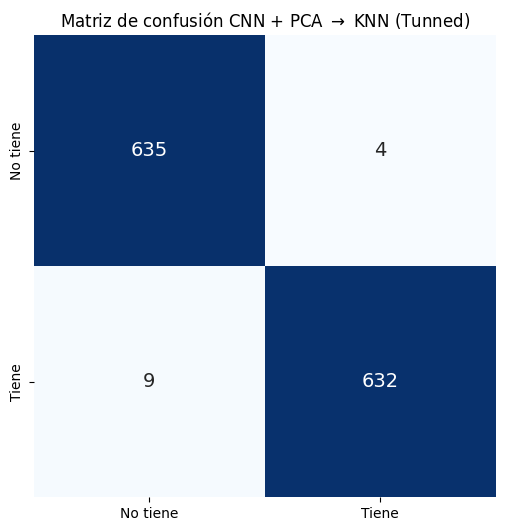

In [301]:
cm_knn_ = confusion_matrix(y_test_, y_pred_knn_t)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn_, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ KNN (Tunned)")
plt.show()

# Naive

In [302]:
y_pred_nb_nt = nb_model.fit(X_train_,y_train_).predict(X_test_)
print(classification_report(y_test_,y_pred_nb_nt, digits=5))

              precision    recall  f1-score   support

           0    0.65700   0.60250   0.62857       639
           1    0.63401   0.68643   0.65918       641

    accuracy                        0.64453      1280
   macro avg    0.64550   0.64447   0.64387      1280
weighted avg    0.64548   0.64453   0.64390      1280



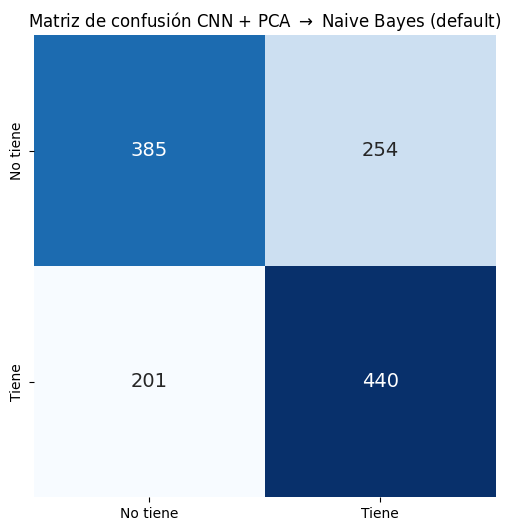

In [303]:
cm_nb = confusion_matrix(y_test_, y_pred_nb_nt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ Naive Bayes (default)")
plt.show()

In [304]:
# Definir la grilla de hiperparámetros que deseas explorar
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Crear un modelo NB
nb_model_ = GaussianNB()

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search_nb = GridSearchCV(estimator=nb_model_, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo SVM utilizando Grid Search
grid_search_nb.fit(X_train_, y_train_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             verbose=2)

In [305]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_nb_model = grid_search_nb.best_estimator_
print(best_nb_model)

GaussianNB(var_smoothing=1e-06)


In [306]:
y_pred_nb_t = best_nb_model.predict(X_test_)
print(classification_report(y_test_,y_pred_nb_t, digits=5))

              precision    recall  f1-score   support

           0    0.67752   0.68388   0.68069       639
           1    0.68189   0.67551   0.67868       641

    accuracy                        0.67969      1280
   macro avg    0.67970   0.67969   0.67968      1280
weighted avg    0.67971   0.67969   0.67968      1280



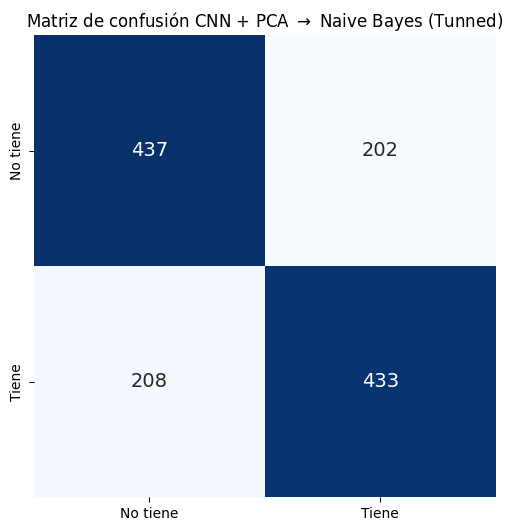

In [307]:
cm_nb_ = confusion_matrix(y_test_, y_pred_nb_t)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb_, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No tiene", "Tiene"], yticklabels=["No tiene", "Tiene"])
plt.title("Matriz de confusión CNN + PCA $\\rightarrow$ Naive Bayes (Tunned)")
plt.show()

In [309]:
pd.DataFrame({
    "KNN":{"Default": accuracy_score(y_test_,y_pred_knn_nt), 'Tunned':accuracy_score(y_test_, y_pred_knn_t)},
    "XBoost":{"Default": accuracy_score(y_test_,y_pred_xb_nt), 'Tunned':accuracy_score(y_test_, y_pred_xb_t)},
    "SVM":{"Default": accuracy_score(y_test_,y_pred_svm_nt), 'Tunned':accuracy_score(y_test_, y_pred_svm_t)},
    "Naive Bayes":{"Default": accuracy_score(y_test_,y_pred_nb_nt), 'Tunned':accuracy_score(y_test_, y_pred_nb_t)},
}).T

Default    Tunned
KNN          0.963281  0.989844
XBoost       0.959375  0.963281
SVM          0.942969  0.997656
Naive Bayes  0.644531  0.679688